In [4]:
import tensorflow as tf
print(tf.keras.__version__)

3.9.1


### Why not just use Numpy?

<b> 1. NumPy Lacks Automatic Differentiation: </b>

> Manual Gradient Calculation in Numpy

In [20]:
import numpy as np
def f(x):
    return x ** 2

def gradient(x):
    return 2*x

x = 5.0
learning_rate = 0.1
for _ in range(10):
    x -= learning_rate * gradient(x)
    print(f"x: {x}, f(x):{f(x)}")

x: 4.0, f(x):16.0
x: 3.2, f(x):10.240000000000002
x: 2.56, f(x):6.5536
x: 2.048, f(x):4.194304
x: 1.6384, f(x):2.68435456
x: 1.31072, f(x):1.7179869184000003
x: 1.0485760000000002, f(x):1.0995116277760004
x: 0.8388608000000002, f(x):0.7036874417766403
x: 0.6710886400000001, f(x):0.45035996273704976
x: 0.5368709120000001, f(x):0.2882303761517119


The above code works for simple cases but is hard to scale for deeper networks as a lot of calculation is needed and there is a lot of coding involved.

> Gradient Computations with Keras.

In [21]:
import tensorflow as tf
x = tf.Variable(5.0)
with tf.GradientTape() as tape:
    y = x ** 2
grad = tape.gradient(y,x)
print(grad.numpy())

10.0


With keras, there is no need of manual calculation as everything is in-built. So, there is no need to calculate manual gradient calculations. Thus, keras is scalable for large networks.

<b> 2. Numpy is Slow for Large Models: </b>

> Matrix Multiplication Speed (Numpy vs. Tensorflow on GPU)

In [22]:
import time
size = (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)

start = time.time()
C_numpy = np.dot(A,B)
print("NumPy Time: ",time.time() - start)

A_tf = tf.constant(A)
B_tf = tf.constant(B)
C_tf = tf.matmul(A_tf, B_tf)

print("TensorFlow Time: ", time.time() - start)

NumPy Time:  0.1291818618774414
TensorFlow Time:  0.2946140766143799


Numpy runs only on CPU and does not support GPU acceleration while deep learning requires millions of matrix operations which Numpy alone cannot optimize efficiently.

<b> 3. No Pre-built Activation Functions and Layers in NumPy. </b>

> Implementation of Activation Function with Keras

In [23]:
from tensorflow.keras.layers import Layer, Dense
layer = Dense(64, activation='sigmoid')

In deep learning there are functions like softmax and sigmoid. With Numpy, we have to manually implement every function while in keras, these functions are in-built.

<b> 4. Keras supports Model Training, Numpy Does not <b>

> Once your model is built, training it in Numpy is complex as it requires computing forward pass, computing loss, computing backward pass manually and updating all the weights using gradients but in the case of Keras, model training only requires one line of code which is easy and efficient

<b> 5. No Prebuilt Layers in Numpy <b>

> Layers in Keras

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
Dense(64, activation='relu', input_shape=(784,)),
Dense(10, activation='softmax')
])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We can easily define layers in keras just like the code above but it is hard to implement each layer in numpy as we will have to do it manually.

<b> 6. No Prebuilt Optimizers in Numpy <b>

> Implementing SGD in Numpy

In [25]:
learning_rate = 0.01
weights = np.random.randn(3, 3)
for _ in range(100): # Training loop
    gradient = np.random.randn(3, 3) # Fake gradient for illustration
    weights -= learning_rate * gradient

> Implementing SGD in Keras

In [26]:
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate = 0.01)

Deep learning requires optimization algorithms like SGD (Stochastic Gradient Descent) and Adam (Adaptive Momentum Estimation). Implementing SGD in Numpy works but it is hard to scale for complex models while in Keras, it is scalable for complex models as it is in-built.

### Building a Fully Connected Network for Devnagari Digit Classification

<b> Task 1: Data Preparation </b>

In [27]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [28]:
# Define dataset paths
test_dir = "C:/Users/Admin/OneDrive/Desktop/College/SEM-6/AI_ML/DevanagariHandwrittenDigitDataset/Test"
train_dir = "C:/Users/Admin/OneDrive/Desktop/College/SEM-6/AI_ML/DevanagariHandwrittenDigitDataset/Train"

In [29]:
# Set image dimensions
img_height, img_width = 28, 28

In [30]:
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder)) # list of all subdirectories in folder
    class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
    
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L") # Convert to grayscale
            img = img.resize((img_width, img_height)) # Resize to (28,28)
            img = np.array(img) / 255.0 # Normalize pixel values to [0,1]
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


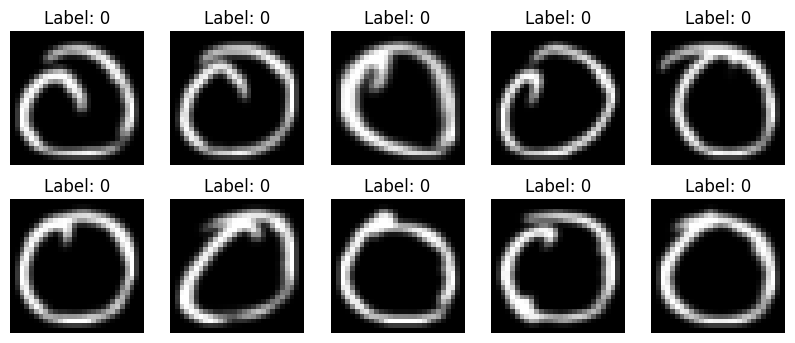

In [31]:
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

<b> Task 2: Build the FCN Model </b>

In [32]:
from tensorflow import keras
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape = input_shape),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation = "sigmoid"),
        keras.layers.Dense(128, activation = "sigmoid"),
        keras.layers.Dense(256, activation = "sigmoid"),
        keras.layers.Dense(10, activation = "softmax"),
    ]
)

<b> Task 3: Compile the Model </b>

In [33]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

<b> Task 4: Train the Model </b>

In [34]:
history = model.fit(
    x_train, 
    y_train,
    batch_size = 128,
    epochs = 20,
    validation_split = 0.15,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
    ]
)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.2934 - loss: 2.0254 - val_accuracy: 0.0475 - val_loss: 5.8113
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8062 - loss: 0.6869 - val_accuracy: 0.2043 - val_loss: 6.4625
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9133 - loss: 0.3138 - val_accuracy: 0.2212 - val_loss: 6.8431
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9461 - loss: 0.1991 - val_accuracy: 0.2322 - val_loss: 7.0372
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9569 - loss: 0.1545 - val_accuracy: 0.2373 - val_loss: 7.1254


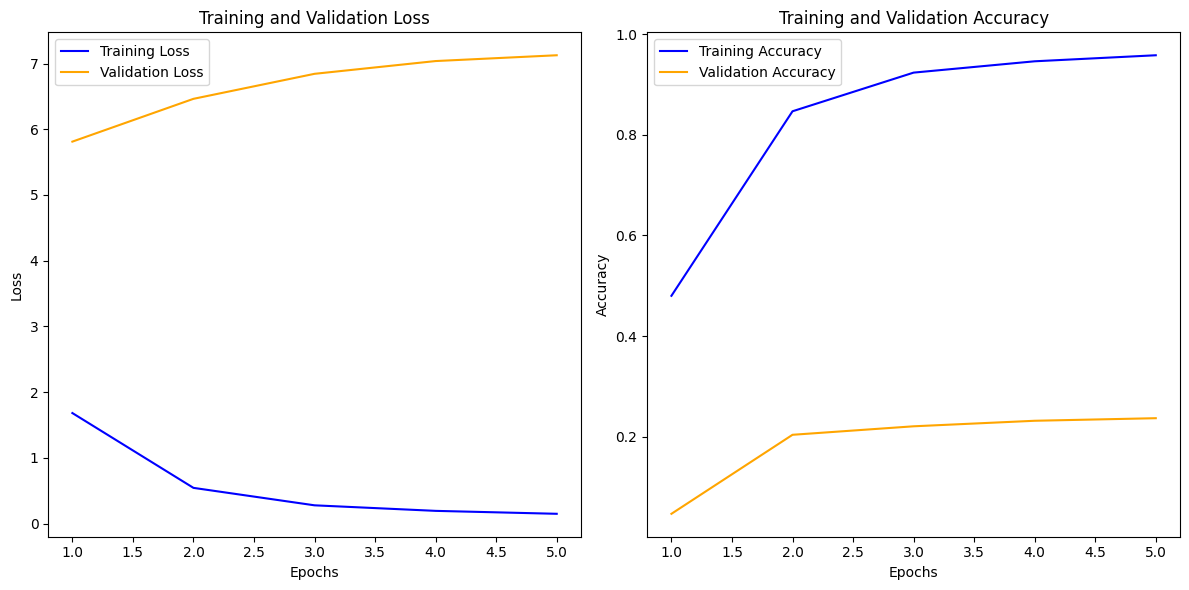

In [35]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training and Validation Loss")
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

<b> Task 5: Evaluate the Model </b>

In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

94/94 - 0s - 3ms/step - accuracy: 0.8493 - loss: 1.2087
Test accuracy: 0.8493
Test loss: 1.2087


<b> Task 6: Predictions </b>

In [37]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Predicted label for first image: 0
True label for first image: 0


<b> Task 7: Save and Load the Model </b>

In [38]:
model.save("final_model.h5")

In [39]:
loaded_model = tf.keras.models.load_model("final_model.h5")
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(x_test, y_test)
print(f"Loaded model test accuracy: {loaded_test_acc:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9572 - loss: 0.2041   
Loaded model test accuracy: 0.8493


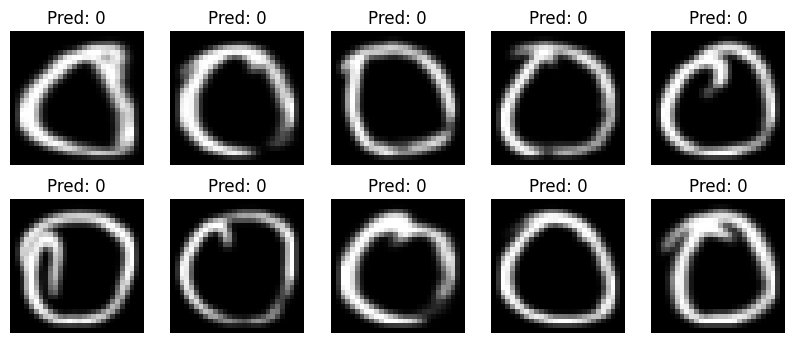

In [40]:
# Visualize some predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis("off")
plt.show()